# Count of each hospital


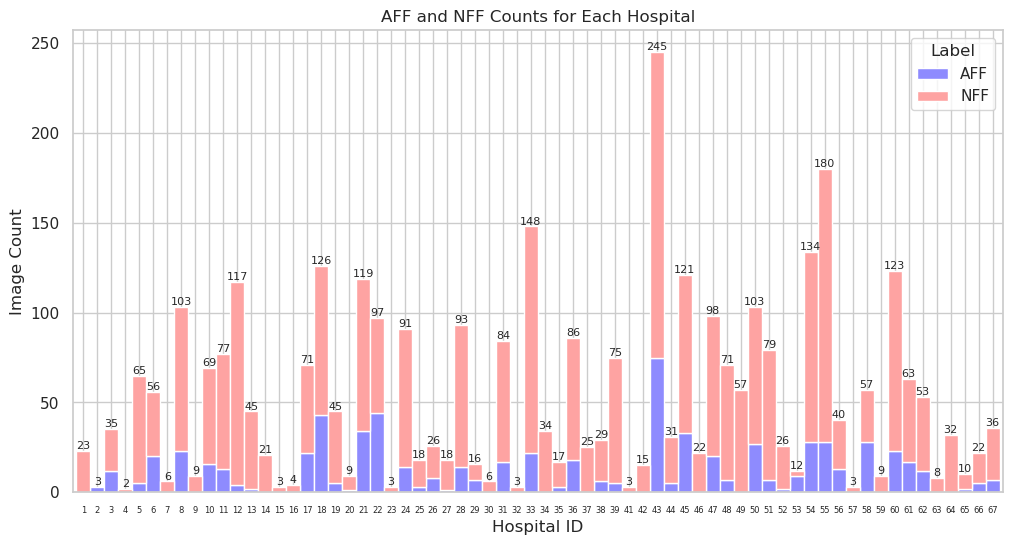

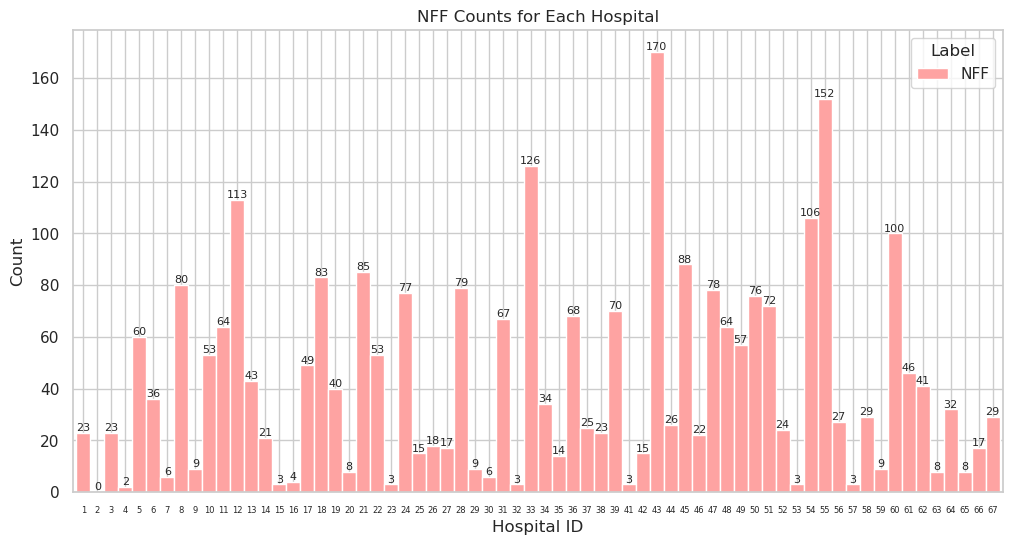

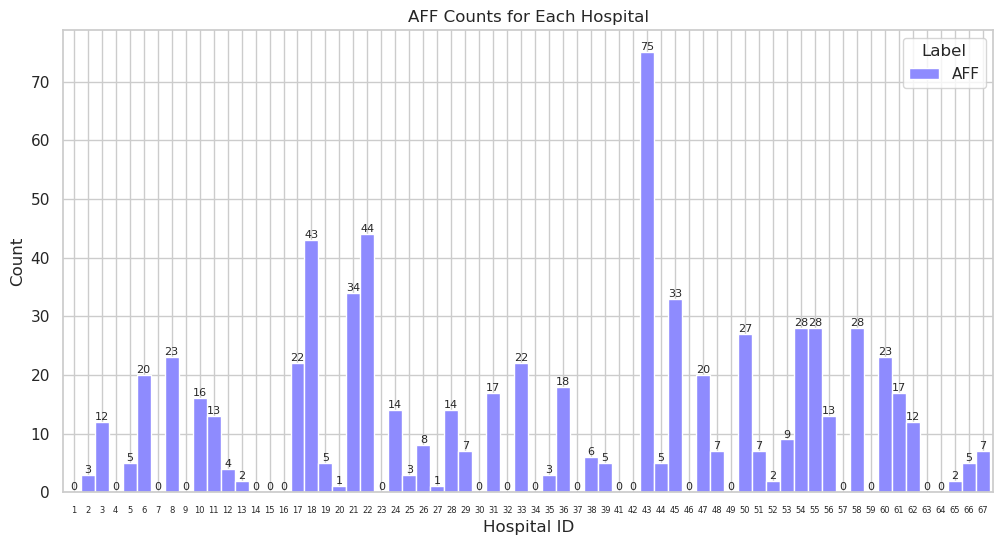

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


# read csv
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# filter HospitalID 100
filtered_data = data[data['HospitalID'] != 100]

# group by hospital ID, count
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)
#-------------------------------------------------------------------------------------------------
# total count
# hospital_label_counts = hospital_label_counts[['NFF', 'AFF']]

hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

colors = ['#8E8BFE','#FEA3A2']

width = 1
# barchat

ax = hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)

plt.xlabel('Hospital ID')
plt.ylabel('Image Count')
plt.title('AFF and NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
hospital_label_counts['Total'] = hospital_label_counts['NFF']

colors = ['#FEA3A2']

# barchat
ax = hospital_label_counts[['NFF']].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
# total count
hospital_label_counts['Total'] = hospital_label_counts['AFF']
colors = ['#8E8BFE']


# barchat
ax = hospital_label_counts[['AFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('AFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()


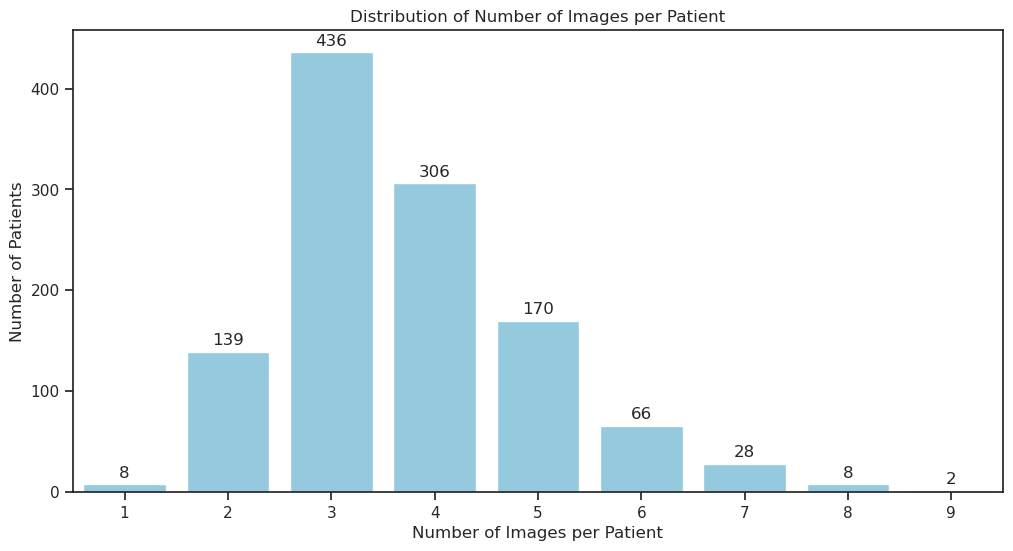

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = data.groupby('PatientID').size().reset_index(name='Image Count')

# 绘制柱形图，并取消不同颜色
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Image Count', data=patient_image_counts, color='skyblue')

# 在每个柱形上显示患者数量
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.xlabel('Number of Images per Patient')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Images per Patient')
plt.show()


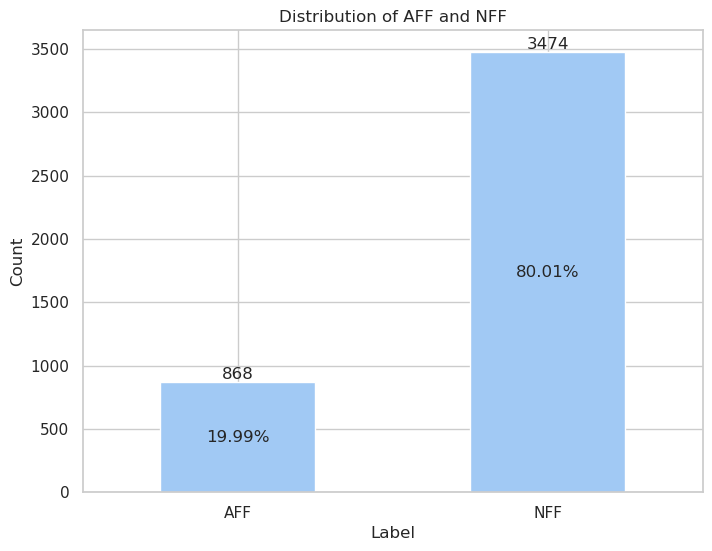

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
# filtered_data = data[data['HospitalID'] != 100]

# 按照标签分组并计算AFF和NFF的数量
label_counts = data.groupby('Label').size()

# 计算比例
label_proportions = label_counts / label_counts.sum()

# 设置绘图风格
# sns.set(style="whitegrid")
sns.set_palette("pastel")

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', label='Count')
ax.set_ylabel('Count')
ax.set_xlabel('Label')
ax.set_title('Distribution of AFF and NFF')
# ax.legend(loc='upper right')

# 在每个条形中间显示比例
for idx, (count, proportion) in enumerate(zip(label_counts, label_proportions)):
    ax.annotate(f'{proportion:.2%}', (idx, count / 2), ha='center', va='center')  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom')  # 显示数量

plt.xticks(rotation=0)  # 使X轴标签水平显示
plt.show()


In [24]:
import pandas as pd

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)

# 统计AFF和NFF的图片数量
aff_image_count = len(df[df['Label'] == 'AFF'])
nff_image_count = len(df[df['Label'] == 'NFF'])

# 计算AFF和NFF的图片数量百分比
total_images = len(df)
aff_image_percentage = (aff_image_count / total_images) * 100
nff_image_percentage = (nff_image_count / total_images) * 100

# 统计AFF和NFF的患者数量
aff_patient_count = df[df['Label'] == 'AFF']['PatientID'].nunique()
nff_patient_count = df[df['Label'] == 'NFF']['PatientID'].nunique()

# 计算AFF和NFF的患者数量百分比
total_patients = df['PatientID'].nunique()
aff_patient_percentage = (aff_patient_count / total_patients) * 100
nff_patient_percentage = (nff_patient_count / total_patients) * 100

# 打印结果
print("总图片数量:", total_images)
print("总图片数量:", total_patients)
print("AFF图片数量:", aff_image_count, "，百分比:", aff_image_percentage, "%")
print("NFF图片数量:", nff_image_count, "，百分比:", nff_image_percentage, "%")
print("AFF患者数量:", aff_patient_count, "，百分比:", aff_patient_percentage, "%")
print("NFF患者数量:", nff_patient_count, "，百分比:", nff_patient_percentage, "%")


总图片数量: 4342
总图片数量: 1163
AFF图片数量: 868 ，百分比: 19.990787655458313 %
NFF图片数量: 3474 ，百分比: 80.0092123445417 %
AFF患者数量: 247 ，百分比: 21.238177128116938 %
NFF患者数量: 916 ，百分比: 78.76182287188306 %


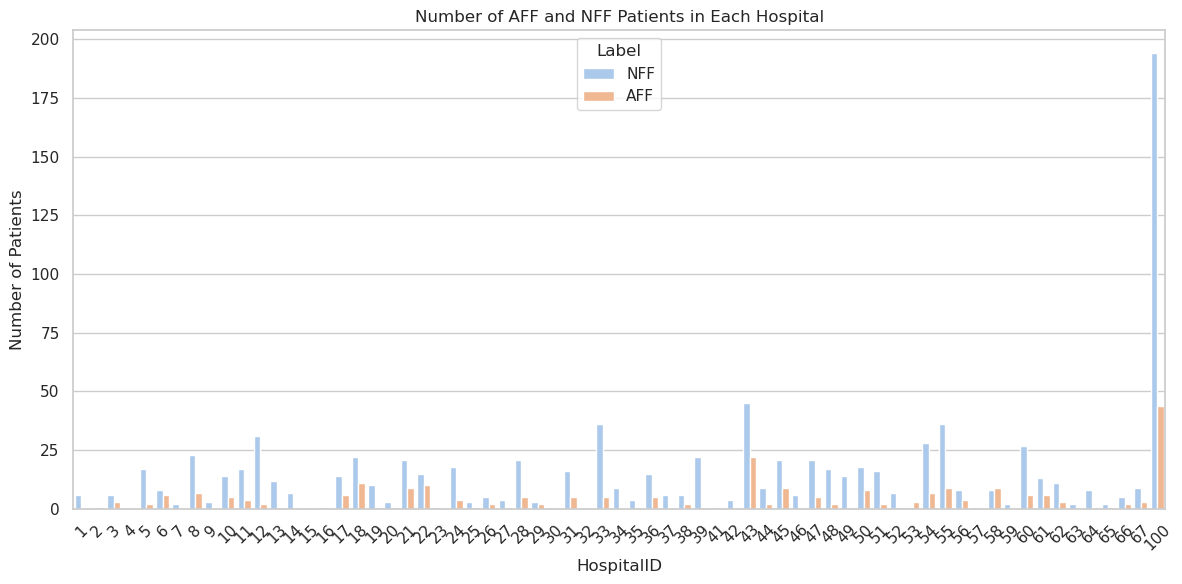

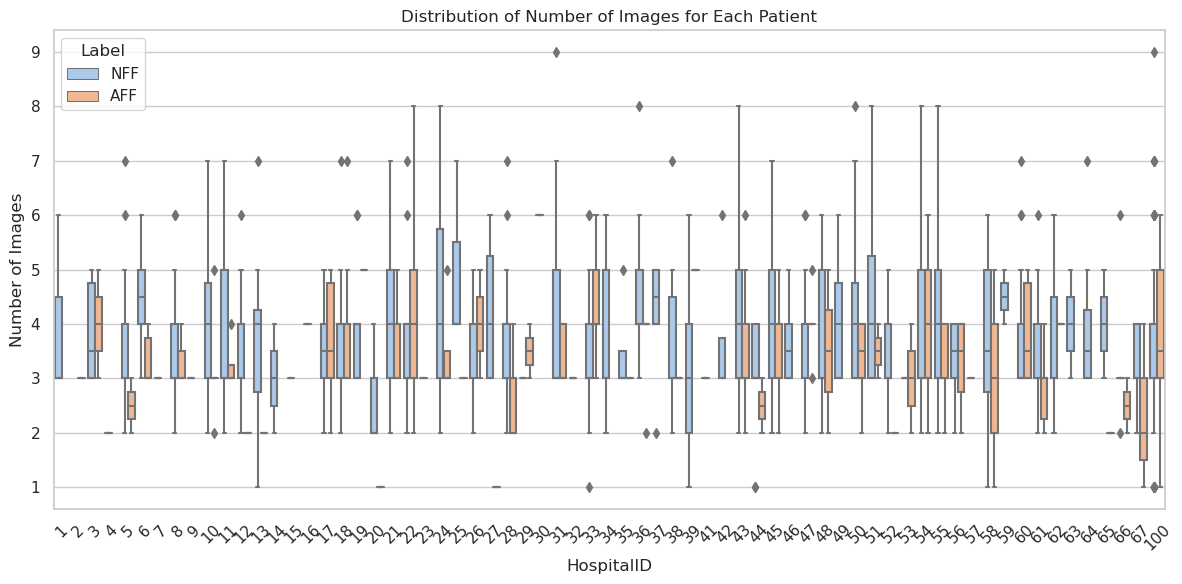

  Label   ImageID
0   AFF  3.233368
1   NFF  3.689469


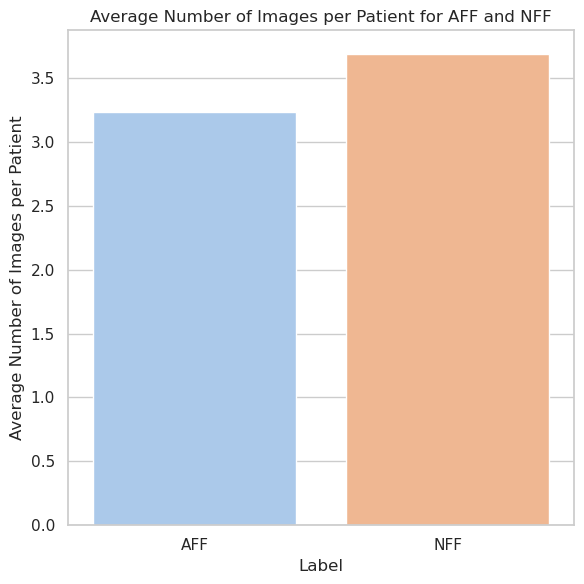

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)

# 统计每个医院的AFF和NFF患者数量
hospital_counts = df.groupby(['HospitalID', 'Label'])['PatientID'].nunique().reset_index()

# 绘制每个医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='PatientID', hue='Label', data=hospital_counts)
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# 统计每位患者的图片数量
patient_image_counts = df.groupby(['HospitalID', 'PatientID', 'Label'])['ImageID'].count().reset_index()

# 绘制每位患者的图片数量箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='HospitalID', y='ImageID', hue='Label', data=patient_image_counts)
plt.xlabel('HospitalID')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images for Each Patient')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# 计算每位患者的平均图片数量
average_image_counts = df.groupby(['HospitalID', 'PatientID', 'Label'])['ImageID'].count().groupby(['HospitalID', 'Label']).mean().reset_index()

# 计算不同医院的AFF和NFF患者平均图片数量
average_image_counts_by_hospital = average_image_counts.groupby('Label')['ImageID'].mean().reset_index()
print(average_image_counts_by_hospital)
# 绘制不同医院的AFF和NFF患者平均图片数量柱状图
plt.figure(figsize=(6, 6))
sns.barplot(x='Label', y='ImageID', data=average_image_counts_by_hospital)
plt.xlabel('Label')
plt.ylabel('Average Number of Images per Patient')
plt.title('Average Number of Images per Patient for AFF and NFF')
plt.tight_layout()
plt.show()


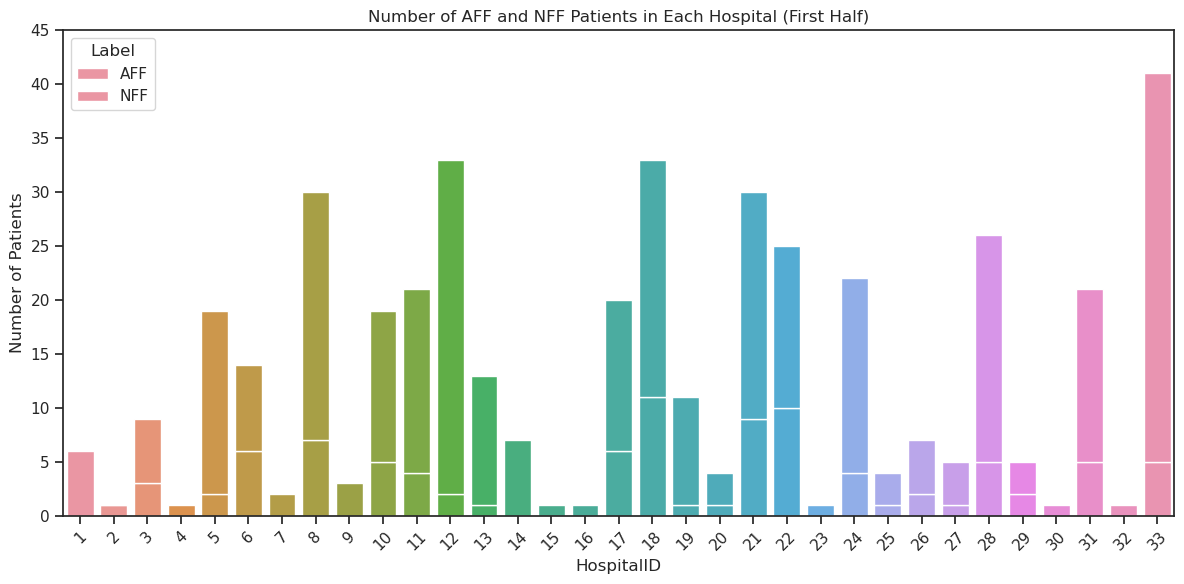

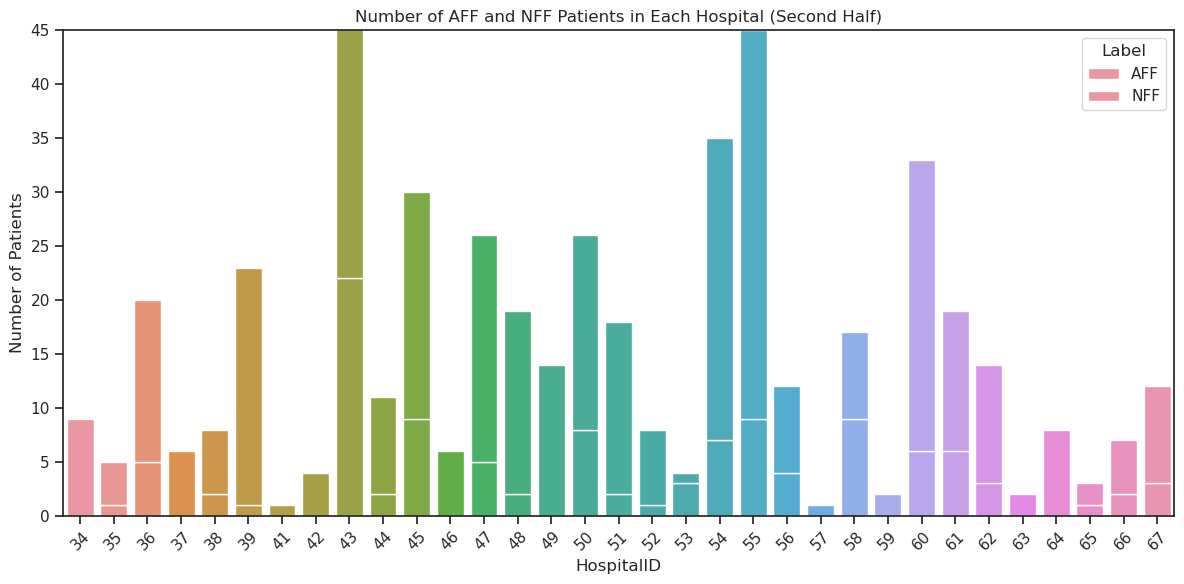

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件并过滤掉HospitalID为100的数据
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)
df = df[df['HospitalID'] != 100]  # 过滤掉HospitalID为100的数据

# 统计每个医院的AFF和NFF患者数量
hospital_counts = df.groupby(['HospitalID', 'Label'])['PatientID'].nunique().reset_index()

# 使用pivot函数将数据透视，确保不存在AFF或者NFF图片的医院显示为0
hospital_counts_pivot = hospital_counts.pivot(index='HospitalID', columns='Label', values='PatientID').reset_index()
hospital_counts_pivot = hospital_counts_pivot.fillna(0)  # 将NaN值填充为0

# 将医院按照ID排序并分成两组
sorted_hospitals = hospital_counts_pivot['HospitalID'].unique()
first_half_hospitals = sorted_hospitals[:len(sorted_hospitals)//2]
second_half_hospitals = sorted_hospitals[len(sorted_hospitals)//2:]

# 创建第一个子图，显示第一组医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='AFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)], label='AFF')
sns.barplot(x='HospitalID', y='NFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)], label='NFF', bottom=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)]['AFF'])
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital (First Half)')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()

# 设置第一个子图的Y轴刻度范围
plt.ylim(0, max(hospital_counts_pivot[['AFF', 'NFF']].values.max(axis=1)))

plt.show()

# 创建第二个子图，显示第二组医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='AFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)], label='AFF')
sns.barplot(x='HospitalID', y='NFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)], label='NFF', bottom=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)]['AFF'])
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital (Second Half)')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()

# 设置第二个子图的Y轴刻度范围
plt.ylim(0, max(hospital_counts_pivot[['AFF', 'NFF']].values.max(axis=1)))

plt.show()


In [5]:
import pandas as pd

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = filtered_data.groupby('PatientID').size()

# 计算中位数、平均数、最大值、最小值和方差
median_count = patient_image_counts.median()
mean_count = patient_image_counts.mean()
max_count = patient_image_counts.max()
min_count = patient_image_counts.min()
variance = patient_image_counts.var()

# 生成包含统计信息的表格
statistics_table = pd.DataFrame({
    'Statistic': ['Median', 'Mean', 'Maximum', 'Minimum', 'Variance'],
    'Value': [median_count, mean_count, max_count, min_count, variance]
})

print(statistics_table)


  Statistic     Value
0    Median  3.000000
1      Mean  3.715789
2   Maximum  9.000000
3   Minimum  1.000000
4  Variance  1.609339


In [ ]:
# hospital 43

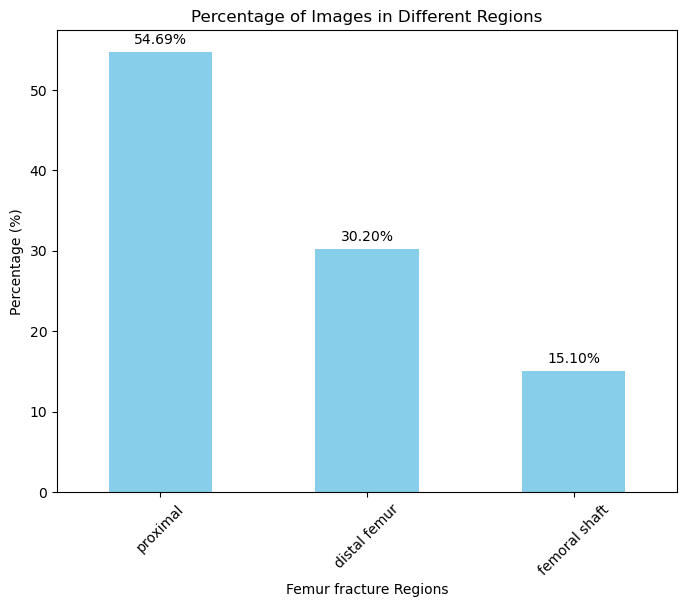

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设你的图片区域数据列表
image_regions = ['proximal'] * 134 + ['femoral shaft'] * 37 + ['distal femur'] * 74

# 计算每个区域的图片数量
region_counts = pd.Series(image_regions).value_counts()

# 计算百分比
total_images = len(image_regions)
region_percentages = (region_counts / total_images) * 100

# 绘制柱状图
plt.figure(figsize=(8, 6))
region_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Images in Different Regions')
plt.xlabel('Femur fracture Regions')
plt.ylabel('Percentage (%)')

# 显示百分比标签
for i, v in enumerate(region_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.show()


In [41]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy  # 确保导入了scipy库

# 定义函数来计算图片的像素、亮度和对比度
def calculate_image_properties(image):
    # 将图像转换为NumPy数组
    image_array = np.array(image)
    
    # 计算图像的像素、亮度和对比度
    pixels = np.prod(image_array.shape)
    brightness = np.mean(image_array)
    contrast = image_array.std()
    
    return pixels, brightness, contrast

# 定义函数来处理文件夹中的所有图像
def process_images(folder_path):
    # 初始化存储结果的列表
    widths, heights, pixel_counts, brightness_values, contrast_values = [], [], [], [], []
    
    # 遍历文件夹中的所有图像
    for filename in os.listdir(folder_path):
        # 生成完整的文件路径
        file_path = os.path.join(folder_path, filename)
        
        # 打开图像
        image = Image.open(file_path)
        
        # 获取图像的宽度和高度
        width, height = image.size
        widths.append(width)
        heights.append(height)
        
        # 计算图像的像素、亮度和对比度
        pixels, brightness, contrast = calculate_image_properties(image)
        pixel_counts.append(pixels)
        brightness_values.append(brightness)
        contrast_values.append(contrast)
    
    # 计算宽度、高度、数量、亮度和对比度的平均值、标准差和偏度
    width_mean, width_std, width_skewness = np.mean(widths), np.std(widths), scipy.stats.skew(widths)
    height_mean, height_std, height_skewness = np.mean(heights), np.std(heights), scipy.stats.skew(heights)
    pixel_mean, pixel_std, pixel_skewness = np.mean(pixel_counts), np.std(pixel_counts), scipy.stats.skew(pixel_counts)
    brightness_mean, brightness_std, brightness_skewness = np.mean(brightness_values), np.std(brightness_values), scipy.stats.skew(brightness_values)
    contrast_mean, contrast_std, contrast_skewness = np.mean(contrast_values), np.std(contrast_values), scipy.stats.skew(contrast_values)
    
    # 返回计算结果
    return (width_mean, width_std, width_skewness), (height_mean, height_std, height_skewness), (pixel_mean, pixel_std, pixel_skewness), (brightness_mean, brightness_std, brightness_skewness), (contrast_mean, contrast_std, contrast_skewness)

# 指定文件夹路径
folder_path = '/local/data1/honzh073/data/8bit_raw'

# 处理图像并获取统计信息
width_stats, height_stats, pixel_stats, brightness_stats, contrast_stats = process_images(folder_path)

# 打印结果
print("宽度统计信息 (平均值, 标准差, 偏度):", width_stats)
print("高度统计信息 (平均值, 标准差, 偏度):", height_stats)
print("像素数量统计信息 (平均值, 标准差, 偏度):", pixel_stats)
print("亮度统计信息 (平均值, 标准差, 偏度):", brightness_stats)
print("对比度统计信息 (平均值, 标准差, 偏度):", contrast_stats)




宽度统计信息 (平均值, 标准差, 偏度): (2205.1427913403963, 625.0274428741335, 0.10201873121306015)
高度统计信息 (平均值, 标准差, 偏度): (2721.333947489636, 429.0836705767638, 0.22697427507589255)
像素数量统计信息 (平均值, 标准差, 偏度): (6090662.42860433, 2305397.395951394, 0.9255945732385172)
亮度统计信息 (平均值, 标准差, 偏度): (72.76635668492636, 28.468405588878927, 0.27038716563517934)
对比度统计信息 (平均值, 标准差, 偏度): (46.961547387447055, 12.137622294551806, 0.17274469012846913)


In [43]:
import pandas as pd

# 定义统计信息
statistics = {
    '属性': ['宽度', '高度', '像素数量', '亮度', '对比度'],
    '平均值': [2205.1427913403963, 2721.333947489636, 6090662.42860433, 72.76635668492636, 46.961547387447055],
    '标准差': [625.0274428741335, 429.0836705767638, 2305397.395951394, 28.468405588878927, 12.137622294551806],
    '偏度': [0.10201873121306015, 0.22697427507589255, 0.9255945732385172, 0.27038716563517934, 0.17274469012846913]
}

# 创建DataFrame
df = pd.DataFrame(statistics)

# 输出DataFrame为表格
print(df)


     属性           平均值           标准差        偏度
0    宽度  2.205143e+03  6.250274e+02  0.102019
1    高度  2.721334e+03  4.290837e+02  0.226974
2  像素数量  6.090662e+06  2.305397e+06  0.925595
3    亮度  7.276636e+01  2.846841e+01  0.270387
4   对比度  4.696155e+01  1.213762e+01  0.172745


# 统计不同医院的X-ray图片数据，根据X-ray的图片信息，找出数据分布相似的一些医院，为后续的group分组提供帮助：

# 读取8bit图片的信息，存储到CSV文件

In [63]:
from PIL import Image
import pandas as pd
import os

# 定义存储图片信息的空列表
image_info = []

# 遍历文件夹中的所有图片文件
image_folder = '/local/data1/honzh073/data/8bit_raw'
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):  # 确保只处理PNG格式的图片文件
        # 读取图片
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # 提取图片信息（长度、宽度、亮度、图片对比度）
        width, height = image.size
        brightness = image.convert('L').getextrema()[1]  # 获取亮度（灰度范围中的最大值）
        contrast = image.getextrema()[0]  # 获取图片对比度（灰度范围中的最小值）

        # 将图片信息添加到列表中
        image_info.append({'Filename': filename, 'Width': width, 'Height': height, 'Brightness': brightness, 'Contrast': contrast})

# 将图片信息列表转换为DataFrame
image_df = pd.DataFrame(image_info)

# 将DataFrame保存为CSV文件
output_csv = '/local/data1/honzh073/data/image_info.csv'
image_df.to_csv(output_csv, index=False)

print(f"Image information saved to {output_csv}")


Image information saved to /local/data1/honzh073/data/image_info.csv
